In [14]:
# ## Hücre 1: Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# ## Hücre 2: Veri Setlerinin Yüklenmesi
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [16]:
# ## Hücre 3: Veri Ön İşleme
# Gereksiz sütunların kaldırılması
ratings = ratings.drop(columns=['timestamp'])
# Veri setlerinin birleştirilmesi
merged_df = pd.merge(ratings, movies, on='movieId')
# Türlerin ayrıştırılması
genres_split = merged_df['genres'].str.get_dummies(sep='|')
merged_df = pd.concat([merged_df, genres_split], axis=1)

In [17]:
# ## Hücre 4: Özet İstatistiklerin Hesaplanması
# Kullanıcı başına ortalama puan
user_avg_rating = merged_df.groupby('userId')['rating'].mean().reset_index()
user_avg_rating.rename(columns={'rating': 'avg_user_rating'}, inplace=True)

# Film başına ortalama puan
movie_avg_rating = merged_df.groupby('movieId')['rating'].mean().reset_index()
movie_avg_rating.rename(columns={'rating': 'avg_movie_rating'}, inplace=True)

# Kullanıcı-tür ortalamaları
user_genre_avg = merged_df.groupby('userId')[list(genres_split.columns)].mean().reset_index()
user_genre_avg.columns = ['userId'] + [f'user_avg_{col}' for col in genres_split.columns]
merged_df = pd.merge(merged_df, user_genre_avg, on='userId', how='left')
merged_df = pd.merge(merged_df, user_avg_rating, on='userId', how='left')
merged_df = pd.merge(merged_df, movie_avg_rating, on='movieId', how='left')

In [18]:
# ## Hücre 5: Özelliklerin ve Hedefin Ayrıştırılması
features_with_genres = pd.concat([merged_df[['avg_user_rating', 'avg_movie_rating'] + list(user_genre_avg.columns[1:])]], axis=1)
target = merged_df['rating']

In [19]:
# ## Hücre 6: Veri Setini Eğitim ve Test Olarak Bölme
X_train_with_genres, X_test_with_genres, y_train, y_test = train_test_split(features_with_genres, target, test_size=0.2, random_state=42)


In [20]:
# ## Hücre 7: Decision Tree Modeli
# Modelin eğitimi
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_with_genres, y_train)
y_pred_dt = dt_model.predict(X_test_with_genres)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))


In [21]:
# ## Hücre 8: Linear Regression Modeli
lr_model = LinearRegression()
lr_model.fit(X_train_with_genres, y_train)
y_pred_lr = lr_model.predict(X_test_with_genres)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [22]:
# ## Hücre 9: Ridge Regression Modeli
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_with_genres, y_train)
y_pred_ridge = ridge_model.predict(X_test_with_genres)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

In [23]:
# ## Hücre 10: Lasso Regression Modeli
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_with_genres, y_train)
y_pred_lasso = lasso_model.predict(X_test_with_genres)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [24]:
# ## Hücre 11: ElasticNet Regression Modeli
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elasticnet_model.fit(X_train_with_genres, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test_with_genres)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))

In [25]:
# ## Hücre 13: K-Nearest Neighbors Regression (KNN)
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train_with_genres, y_train)
y_pred_knn = knn_model.predict(X_test_with_genres)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

In [26]:
# ## Hücre 14: Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_with_genres, y_train)
y_pred_gb = gb_model.predict(X_test_with_genres)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

In [27]:
# ## Hücre 15: Performans Değerlendirme Sonuçları
performance_results = pd.DataFrame({
    'Model': [
        'Decision Tree', 'Linear Regression', 'Ridge Regression', 'Lasso Regression',
        'ElasticNet Regression', 'KNN Regression', 'Gradient Boosting'
    ],
    'Mean Absolute Error (MAE)': [
        mae_dt, mae_lr, mae_ridge, mae_lasso, mae_elasticnet, mae_knn, mae_gb
    ],
    'Root Mean Squared Error (RMSE)': [
        rmse_dt, rmse_lr, rmse_ridge, rmse_lasso, rmse_elasticnet, rmse_knn, rmse_gb
    ]
})
print(performance_results)

                   Model  Mean Absolute Error (MAE)  \
0          Decision Tree                   0.779172   
1      Linear Regression                   0.608100   
2       Ridge Regression                   0.608043   
3       Lasso Regression                   0.650907   
4  ElasticNet Regression                   0.636019   
5         KNN Regression                   0.673203   
6      Gradient Boosting                   0.603701   

   Root Mean Squared Error (RMSE)  
0                        1.084865  
1                        0.801263  
2                        0.801203  
3                        0.844350  
4                        0.829568  
5                        0.898537  
6                        0.795772  


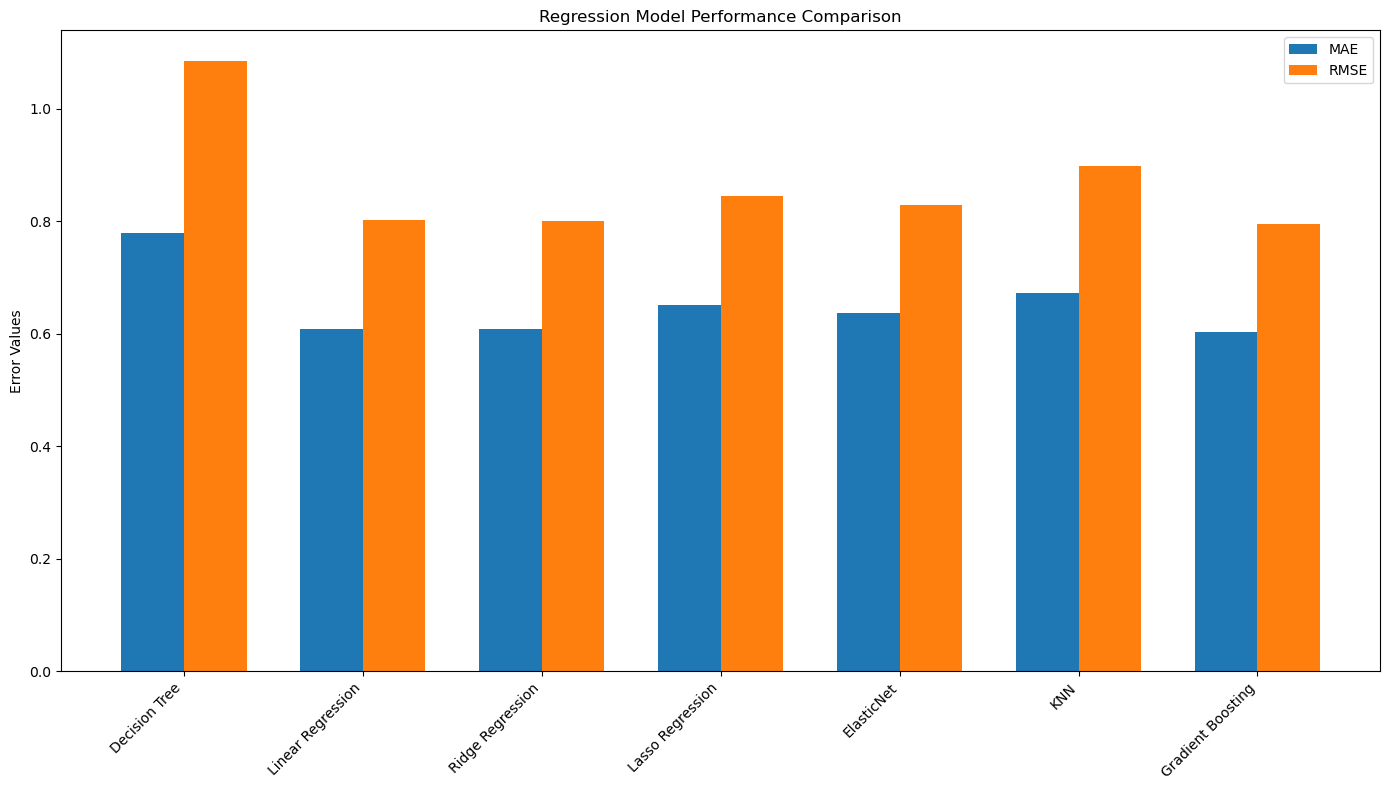

In [28]:
# ## Hücre 16: Karşılaştırma Grafiği
labels = [
    'Decision Tree', 'Linear Regression', 'Ridge Regression', 'Lasso Regression',
    'ElasticNet',  'KNN', 'Gradient Boosting'
]
mae_values = [
    mae_dt, mae_lr, mae_ridge, mae_lasso, mae_elasticnet,  mae_knn, mae_gb
]
rmse_values = [
    rmse_dt, rmse_lr, rmse_ridge, rmse_lasso, rmse_elasticnet,  rmse_knn, rmse_gb
]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error Values')
ax.set_title('Regression Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()


In [33]:
# ## Hücre 17: Tahminlerle Özelliklerin Birleştirilmesi
#results_with_predictions = X_test_with_genres.copy()
results_with_predictions = pd.DataFrame()
results_with_predictions['Actual Rating'] = y_test.values
results_with_predictions['Decision Tree Prediction'] = y_pred_dt
results_with_predictions['Linear Regression Prediction'] = y_pred_lr
results_with_predictions['Ridge Regression Prediction'] = y_pred_ridge
results_with_predictions['Lasso Regression Prediction'] = y_pred_lasso
results_with_predictions['ElasticNet Prediction'] = y_pred_elasticnet
results_with_predictions['KNN Prediction'] = y_pred_knn
results_with_predictions['Gradient Boosting Prediction'] = y_pred_gb

(results_with_predictions.head())

,Actual Rating,Decision Tree Prediction,Linear Regression Prediction,Ridge Regression Prediction,Lasso Regression Prediction,ElasticNet Prediction,KNN Prediction,Gradient Boosting Prediction
0,4.0,4.000000,3.578631,3.579717,3.582780,3.607520,4.000000,3.589440
1,2.0,2.777778,2.708448,2.707740,2.944114,2.891236,2.666667,2.767790
2,4.0,3.000000,3.198742,3.196902,3.329632,3.286541,3.333333,3.213028
3,5.0,4.000000,3.838421,3.836985,3.728011,3.729103,4.000000,3.948346
4,4.0,4.000000,3.383817,3.384862,3.494936,3.500698,3.000000,3.449993
